In [145]:
import pandas as pd
import sqlite3

# db 경로는 로컬에 맞게 설정해야함
conn = sqlite3.connect("C:/Python_workspace/2jo_Final_Python/DB/samsung.db")

# 커서 바인딩
c = conn.cursor()

# 데이터 조회
query = c.execute("select a.id, a.date, a.code, b.senti, b.senti_proba from news_db b join news_id a on b.id = a.id where a.date BETWEEN '20210301' and '20210401';")
# 컬럼명 조회
cols = [column[0] for column in query.description]
# 데이터 프레임으로 만들기
news_result = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
# 커서 닫기 - 일단 주석처리함
# conn.close()

In [146]:
news_result

,id,date,code,senti,senti_proba
0,858,20210301,삼성전자,1,0.999
1,859,20210301,삼성전자,0,0.997
2,860,20210301,삼성전자,1,0.999
3,862,20210301,삼성전자,0,0.997
4,863,20210301,삼성전자,0,0.957
...,...,...,...,...,...
377,1236,20210401,삼성전자,0,0.991
378,1237,20210401,삼성전자,0,0.991
379,1238,20210401,삼성전자,-1,0.941
380,1239,20210401,삼성전자,0,0.997


In [160]:
# 데이터 조회
# query = c.execute("select a.id, a.date, a.code, b.senti, b.senti_proba from news_db b join news_id a on b.id = a.id where a.date BETWEEN '20210111' and '20210118';")
query = c.execute("select s_date, s_code, close-open from stock_db where s_date BETWEEN '20210301' and '20210401';")
# 컬럼명 조회
cols = [column[0] for column in query.description]
# 데이터 프레임으로 만들기
stock_result = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
stock_result.rename(columns={'s_date': 'date', 's_code': 'code', 'close-open': 'UpDown'}, inplace=True)
# stock_result['date'] = stock_result['date'].astype(str)
# stock_result['date'] = pd.to_datetime(stock_result['date'])
stock_result

,date,code,UpDown
0,20210302,삼성전자,-1500
1,20210303,삼성전자,500
2,20210304,삼성전자,-200
3,20210305,삼성전자,1000
4,20210308,삼성전자,-900
5,20210309,삼성전자,0
6,20210310,삼성전자,-1500
7,20210311,삼성전자,1000
8,20210312,삼성전자,-300
9,20210315,삼성전자,-1000


In [161]:
# 뉴스데이터 프레임과 주가 데이터 프레임을 date 열을 기준으로 병합 - 주가가 빈 날짜는 NAN으로 찍힘
merge_outer = pd.merge(news_result,stock_result, how='outer',on='date')
merge_outer = merge_outer.dropna(subset=['UpDown'])
merge_outer
# merge_outer.to_csv('temp_1.csv', encoding='utf-8')

,id,date,code_x,senti,senti_proba,code_y,UpDown
7,866,20210302,삼성전자,0,0.996,삼성전자,-1500.0
8,867,20210302,삼성전자,1,0.999,삼성전자,-1500.0
9,868,20210302,삼성전자,0,0.992,삼성전자,-1500.0
10,869,20210302,삼성전자,1,0.999,삼성전자,-1500.0
11,870,20210302,삼성전자,-1,0.987,삼성전자,-1500.0
...,...,...,...,...,...,...,...
377,1236,20210401,삼성전자,0,0.991,삼성전자,400.0
378,1237,20210401,삼성전자,0,0.991,삼성전자,400.0
379,1238,20210401,삼성전자,-1,0.941,삼성전자,400.0
380,1239,20210401,삼성전자,0,0.997,삼성전자,400.0


In [162]:
# bfill 옵션으로 주가가 비어있는 날은 결측치 뒤에있는 값으로 채움
result = merge_outer.fillna(method='bfill')
# result.to_csv('temp_2.csv', encoding='utf-8')

,id,date,code_x,senti,senti_proba,code_y,UpDown
7,866,20210302,삼성전자,0,0.996,삼성전자,-1500.0
8,867,20210302,삼성전자,1,0.999,삼성전자,-1500.0
9,868,20210302,삼성전자,0,0.992,삼성전자,-1500.0
10,869,20210302,삼성전자,1,0.999,삼성전자,-1500.0
11,870,20210302,삼성전자,-1,0.987,삼성전자,-1500.0
...,...,...,...,...,...,...,...
377,1236,20210401,삼성전자,0,0.991,삼성전자,400.0
378,1237,20210401,삼성전자,0,0.991,삼성전자,400.0
379,1238,20210401,삼성전자,-1,0.941,삼성전자,400.0
380,1239,20210401,삼성전자,0,0.997,삼성전자,400.0


In [164]:
dateg = result.groupby(['date']).mean()
dateg = dateg[['senti', 'UpDown']]
dateg.reset_index()

,date,senti,UpDown
0,20210302,0.200000,-1500.0
1,20210303,0.363636,500.0
2,20210304,0.200000,-200.0
3,20210305,0.000000,1000.0
4,20210308,0.076923,-900.0
5,20210309,0.285714,0.0
6,20210310,0.333333,-1500.0
7,20210311,0.066667,1000.0
8,20210312,0.200000,-300.0
9,20210315,0.076923,-1000.0


In [45]:
dateg['3일 이동 평균'] = dateg['senti'].rolling(window=3).mean()
# dateg['3일 이동 평균'] = dateg['senti'].rolling(window=3).mean()


In [46]:
dateg

,senti,UpDown,3일 이동 평균
date,,,
20210111,0.000000,1000.0,NaN
20210112,-0.031250,300.0,NaN
20210113,0.111111,-100.0,0.026620
20210114,0.400000,1000.0,0.159954
20210115,0.296296,-1800.0,0.269136
20210116,0.111111,-1600.0,0.269136
20210117,0.222222,-1600.0,0.209877
20210118,-0.265306,-1600.0,0.022676


In [73]:
# 날짜 계산 예제
from datetime import datetime, timedelta, date

start_day = 20210301

convert_date = datetime.strptime(str(start_day), "%Y%m%d").date()

inq_day = convert_date - timedelta(days=3)

inq_day.strftime('%Y%m%d')

'20210226'

In [95]:
start_day = 20210301
period = 3

inq_day = (datetime.strptime(str(start_day), "%Y%m%d").date() - timedelta(days = period - 1)).strftime('%Y%m%d')
inq_day

'20210227'

In [76]:
end_day = 20200101
end_day = str(end_day)
end_day

'20200101'

In [134]:
import pandas as pd
import sqlite3
from datetime import datetime, timedelta, date

def service(start_day, end_day, period, drop_holi = 0):
    '''
    조회 시작, 끝 날짜와 평균 낼 기간을 입력받아
    해당 기간의 데이터를 DB로 부터 조회하여 원하는 형태로 가공하여 리턴하는 함수
    '''
    # 평균낼 기간을 고려하여 DB에서 조회할 날짜 설정
    inq_day = (datetime.strptime(str(start_day), "%Y%m%d").date() - timedelta(days = period - 1)).strftime('%Y%m%d')
    end_day = str(end_day)

    # db 경로는 로컬에 맞게 설정해야함
    conn = sqlite3.connect("C:/Python_workspace/2jo_Final_Python/DB/samsung.db")

    # 커서 바인딩
    c = conn.cursor()

    # 뉴스데이터 조회
    query = c.execute(f"select a.id, a.date, a.code, b.senti, b.senti_proba from news_db b join news_id a on b.id = a.id where a.date BETWEEN {inq_day} and {end_day};")
    # 컬럼명 조회
    cols = [column[0] for column in query.description]
    # 데이터 프레임으로 만들기
    news_result = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)

    # 커서 닫기 - 일단 주석처리함
    # conn.close()

    # 주가 데이터 조회
    # query = c.execute("select a.id, a.date, a.code, b.senti, b.senti_proba from news_db b join news_id a on b.id = a.id where a.date BETWEEN '20210111' and '20210118';")
    query = c.execute(f"select s_date, s_code, close-open from stock_db where s_date BETWEEN {inq_day} and {end_day};")
    # 컬럼명 조회
    cols = [column[0] for column in query.description]
    # 데이터 프레임으로 만들기
    stock_result = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
    stock_result.rename(columns={'s_date': 'date', 's_code': 'code', 'close-open': 'UpDown'}, inplace=True)
    
    # 옵션에 따라
    if drop_holi:
        # 주말이나 공휴일 등으로 주가가 빠진 날은 drop
        merge_outer_df = pd.merge(news_result,stock_result, how='outer',on='date')
        merge_outer_df = merge_outer_df.dropna(subset=['UpDown'])
    else:
        # 주말이나 공휴일 등으로 주가가 빠진 날은 다음 Business Day의 주가로 채워줌
        merge_outer_df = pd.merge(news_result,stock_result, how='outer',on='date').fillna(method='bfill')

    dateg = merge_outer_df.groupby(['date']).mean()
    dateg = dateg[['senti', 'UpDown']]
    dateg = dateg.reset_index()

    dateg['senti_moving_avg'] = dateg['senti'].rolling(window=period).mean()
    dateg['UpDown_moving_avg'] = dateg['UpDown'].rolling(window=period).mean()

    dateg = dateg[['date', 'senti_moving_avg', 'UpDown_moving_avg']]
    dateg.dropna(inplace=True)
    
    return dateg

In [171]:
result = service(20210301, 20210401, 3, drop_holi=0)
# result

In [172]:
result['UpDown_moving_avg'] = result['UpDown_moving_avg'].shift(-1)
result

,date,senti_moving_avg,UpDown_moving_avg
2,20210301,0.323810,-1500.000000
3,20210302,0.390476,-833.333333
4,20210303,0.378355,-400.000000
5,20210304,0.254545,433.333333
6,20210305,0.187879,-33.333333
7,20210306,-0.044444,-266.666667
8,20210307,0.031746,-900.000000
9,20210308,0.057387,-600.000000
10,20210309,0.263736,-800.000000
11,20210310,0.231990,-166.666667


In [140]:
# 열 정규화 하기
import pandas as pd
from sklearn import preprocessing

date_c = list(result['date'])

x = result.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
result = pd.DataFrame(x_scaled, columns=result.columns)
result['date'] = date_c
result['date'] = result['date'].astype(str)
result['date'] = pd.to_datetime(result['date'])
result.head()

,date,senti_moving_avg,UpDown_moving_avg
0,2021-03-01,0.891602,0.000000
1,2021-03-02,1.000000,0.000000
2,2021-03-03,0.980291,0.344828
3,2021-03-04,0.778981,0.568966
4,2021-03-05,0.670583,1.000000


In [141]:
# 유리ver
# 정규화 하기 전 dataframe 나눈 후 정규화 후 합치기
# from sklearn.preprocessing import StandardScaler

# df_date = result[['date']].reset_index()
# df_date = df_date[['date']]
# df_value = result[['senti_moving_avg','UpDown_moving_avg']].reset_index()
# df_value = df_value[['senti_moving_avg','UpDown_moving_avg']]

# # StandardScaler객체 생성
# scaler = StandardScaler()

# # StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
# scaler.fit(df_value)
# value_scaled = scaler.transform(df_value)

# # transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# df_scaled = pd.DataFrame(data=value_scaled, columns=['senti_moving_avg','UpDown_moving_avg'])

# # 정규화 후 concat(date, value)
# result_2 = pd.concat([df_date, df_scaled], axis=1)
# result_2

(array([18687., 18691., 18695., 18699., 18703., 18707., 18711., 18715.,
        18718.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

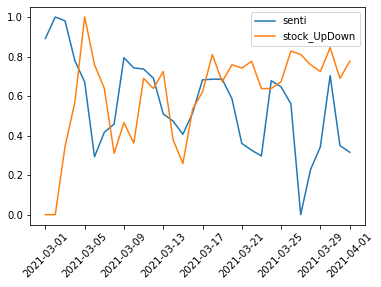

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ax = sns.scatterplot(data=result, x='senti_moving_avg', y='UpDown_moving_avg')
# fig, axe1 = plt.subplots()
# axe2 = axe1.twinx()
# c1 = sns.lineplot(ax = axe1, data = result, x = 'date', y = 'senti_moving_avg', color = 'red')
# c2 = sns.lineplot(ax = axe2, data = result, x = 'date', y = 'UpDown_moving_avg', color = 'blue')

plt.plot(result['date'], result['senti_moving_avg'], label = 'senti') 
plt.plot(result['date'], result['UpDown_moving_avg'], label='stock_UpDown')
plt.legend()
plt.xticks(rotation=45)

<AxesSubplot:>

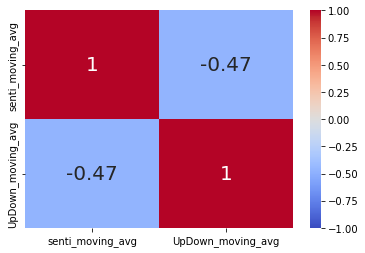

In [144]:
pairplot = result
sns.heatmap(pairplot.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm", annot_kws={'size' : 20})